In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('dark_background')
import seaborn as sns
import sys
sys.path.insert(1, '/home/mauricio/code/mcr')
from mcr.util import glimpse, plot_value_counts, plot_value_counts_timeseries, missing_report, plot_missing, plot_unique, plot_duplicates, size

from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.sql import functions as F
from pyspark.sql.types import *

23/05/02 19:23:48 WARN Utils: Your hostname, rig resolves to a loopback address: 127.0.1.1; using 192.168.0.102 instead (on interface enp6s0)
23/05/02 19:23:48 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/02 19:23:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Define a new schema using the StructType method
schema = StructType(
    [
        StructField("No.", LongType(), True),
        StructField("MLSID", StringType(), True),
        StructField("StreetNumberNumeric", LongType(), True),
        StructField("streetaddress", StringType(), True),
        StructField("STREETNAME", StringType(), True),
        StructField("PostalCode", LongType(), True),
        StructField("StateOrProvince", StringType(), True),
        StructField("City", StringType(), True),
        StructField("SalesClosePrice", LongType(), True),
        StructField("LISTDATE", DateType(), True),
        StructField("LISTPRICE", LongType(), True),
        StructField("LISTTYPE", StringType(), True),
        StructField("OriginalListPrice", LongType(), True),
        StructField("PricePerTSFT", DoubleType(), True),
        StructField("FOUNDATIONSIZE", LongType(), True),
        StructField("FENCE", StringType(), True),
        StructField("MapLetter", StringType(), True),
        StructField("LotSizeDimensions", StringType(), True),
        StructField("SchoolDistrictNumber", StringType(), True),
        StructField("DAYSONMARKET", LongType(), True),
        StructField("offmarketdate", DateType(), True),
        StructField("Fireplaces", LongType(), True),
        StructField("RoomArea4", StringType(), True),
        StructField("roomtype", StringType(), True),
        StructField("ROOF", StringType(), True),
        StructField("RoomFloor4", StringType(), True),
        StructField("PotentialShortSale", StringType(), True),
        StructField("PoolDescription", StringType(), True),
        StructField("PDOM", LongType(), True),
        StructField("GarageDescription", StringType(), True),
        StructField("SQFTABOVEGROUND", LongType(), True),
        StructField("Taxes", LongType(), True),
        StructField("RoomFloor1", StringType(), True),
        StructField("RoomArea1", StringType(), True),
        StructField("TAXWITHASSESSMENTS", DoubleType(), True),
        StructField("TAXYEAR", LongType(), True),
        StructField("LivingArea", LongType(), True),
        StructField("UNITNUMBER", StringType(), True),
        StructField("YEARBUILT", LongType(), True),
        StructField("ZONING", StringType(), True),
        StructField("STYLE", StringType(), True),
        StructField("ACRES", DoubleType(), True),
        StructField("CoolingDescription", StringType(), True),
        StructField("APPLIANCES", StringType(), True),
        StructField("backonmarketdate", DateType(), True),
        StructField("ROOMFAMILYCHAR", StringType(), True),
        StructField("RoomArea3", StringType(), True),
        StructField("EXTERIOR", StringType(), True),
        StructField("RoomFloor3", StringType(), True),
        StructField("RoomFloor2", StringType(), True),
        StructField("RoomArea2", StringType(), True),
        StructField("DiningRoomDescription", StringType(), True),
        StructField("BASEMENT", StringType(), True),
        StructField("BathsFull", LongType(), True),
        StructField("BathsHalf", LongType(), True),
        StructField("BATHQUARTER", LongType(), True),
        StructField("BATHSTHREEQUARTER", LongType(), True), # Pandas turns to float64 due to missing values
        StructField("Class", StringType(), True),
        StructField("BATHSTOTAL", LongType(), True),
        StructField("BATHDESC", StringType(), True),
        StructField("RoomArea5", StringType(), True),
        StructField("RoomFloor5", StringType(), True),
        StructField("RoomArea6", StringType(), True),
        StructField("RoomFloor6", StringType(), True),
        StructField("RoomArea7", StringType(), True),
        StructField("RoomFloor7", StringType(), True),
        StructField("RoomArea8", StringType(), True),
        StructField("RoomFloor8", StringType(), True),
        StructField("Bedrooms", LongType(), True),
        StructField("SQFTBELOWGROUND", LongType(), True),
        StructField("AssumableMortgage", StringType(), True),
        StructField("AssociationFee", LongType(), True),
        StructField("ASSESSMENTPENDING", StringType(), True),
        StructField("AssessedValuation", DoubleType(), True),
    ]
)

In [3]:
# Load the CSV file
# inferSchema doesn't parse dates:
# df = spark.read.format('csv').options(Header=True).options(inferSchema=True).options(dateFormat='M/d/y H:m').load('2017_StPaul_MN_Real_Estate.csv', dateFormat='M/d/y H:m')
# schema does parse dates:
df = spark.read.format('csv').options(Header=True).options(dateFormat='M/d/y H:m').load('2017_StPaul_MN_Real_Estate.csv', schema=schema)
# In case we want to cast StringType to TimestampType or DateType after read
# df = df.withColumn('LISTDATE', F.to_timestamp('LISTDATE', format='M/d/y H:m'))
# df = df.withColumn('LISTDATE', F.to_date('LISTDATE', format='M/d/y H:m'))
# df = df.withColumn('offmarketdate', F.to_timestamp('offmarketdate', format='M/d/y H:m'))
# df = df.withColumn('offmarketdate', F.to_date('offmarketdate', format='M/d/y H:m'))
df.printSchema()

root
 |-- No.: long (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- StreetNumberNumeric: long (nullable = true)
 |-- streetaddress: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- PostalCode: long (nullable = true)
 |-- StateOrProvince: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SalesClosePrice: long (nullable = true)
 |-- LISTDATE: date (nullable = true)
 |-- LISTPRICE: long (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- OriginalListPrice: long (nullable = true)
 |-- PricePerTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: long (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MapLetter: string (nullable = true)
 |-- LotSizeDimensions: string (nullable = true)
 |-- SchoolDistrictNumber: string (nullable = true)
 |-- DAYSONMARKET: long (nullable = true)
 |-- offmarketdate: date (nullable = true)
 |-- Fireplaces: long (nullable = true)
 |-- RoomArea4: string (nullable = true)
 |-- roomtype: string (n

In [4]:
with pd.option_context('display.max_rows', 100, 'display.max_colwidth',1000):
    display(glimpse(df.toPandas()))

23/05/02 19:23:50 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 74 entries, No. to AssessedValuation
dtypes: float64(5), int64(22), object(47)
memory usage: 15.3 MB


,field,non-null count,missing ratio,data type,unique count,unique preview
0,ACRES,5000,0.0,float64,570,"[0.0, 0.002, 0.005, 0.007, 0.01, ..., 5.41, 6.0, 6.035, 9.27, 9.47]"
1,APPLIANCES,4669,0.0662,object,743,"[Cooktop, Dishwasher, Refrigerator, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Cooktop, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Cooktop, Exhaust Fan/Hood, Refrigerator, Washer, Dryer, ..., Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Disposal, Washer, Dryer, Water Softener - Owned, Water Softener - Owned, Disposal, Air-To-Air Exchanger, Furnace Humidifier]"
2,ASSESSMENTPENDING,5000,0.0,object,3,"[No, Unknown, Yes]"
3,AssessedValuation,5000,0.0,float64,756,"[0.0, 1.0, 100.0, 1000.0, 1001.0, ..., 930.0, 940.0, 952.56, 978.0, 980.58]"
4,AssociationFee,5000,0.0,int64,332,"[0, 10, 100, 1000, 101, ..., 957, 96, 98, 983, 99]"
5,AssumableMortgage,1896,0.6208,object,4,"[Information Coming, Not Assumable, Yes w/ Qualifying, Yes w/No Qualifying]"
6,BASEMENT,5000,0.0,object,670,"[Concrete Block, Concrete Block, Poured Concrete, Concrete Block, Slab, Unfinished, Concrete Block, Unfinished, Crawl Space, ..., Walkout, Sump Pump, Walkout, Sump Pump, Concrete Block, Walkout, Sump Pump, Day/Lookout Windows, Walkout, Sump Pump, Poured Concrete, Unfinished, Walkout, Unfinished]"
7,BATHDESC,4634,0.0732,object,887,"[1/2 Basement, 1/2 Basement, Basement, 1/2 Basement, Rough In, Basement, 3/4 Basement, 3/4 Basement, Basement, ..., Upper Level Full Bath , Walk-In Shower, Upper Level Full Bath , Walk-In Shower, 3/4 Basement, Upper Level Full Bath , Walk-In Shower, Basement, Upper Level Full Bath , Whirlpool, Whirlpool]"
8,BATHQUARTER,5000,0.0,int64,3,"[0, 1, 2]"
9,BATHSTHREEQUARTER,4999,0.0002,float64,5,"[0.0, 1.0, 2.0, 3.0, 4.0]"


In [5]:
# Stanrdaize column names
from re import sub
df = df.selectExpr([f"`{c}` as " + sub(r'\.', '', c).upper() for c in df.columns])

In [6]:
# Save imported CSV->Dataframe to Parquet and read it back
df.write.parquet('Real_Estate.parq', mode='overwrite')
df = spark.read.parquet('Real_Estate.parq')
df.printSchema()

root
 |-- NO: long (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- STREETNUMBERNUMERIC: long (nullable = true)
 |-- STREETADDRESS: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- POSTALCODE: long (nullable = true)
 |-- STATEORPROVINCE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SALESCLOSEPRICE: long (nullable = true)
 |-- LISTDATE: date (nullable = true)
 |-- LISTPRICE: long (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- ORIGINALLISTPRICE: long (nullable = true)
 |-- PRICEPERTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: long (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MAPLETTER: string (nullable = true)
 |-- LOTSIZEDIMENSIONS: string (nullable = true)
 |-- SCHOOLDISTRICTNUMBER: string (nullable = true)
 |-- DAYSONMARKET: long (nullable = true)
 |-- OFFMARKETDATE: date (nullable = true)
 |-- FIREPLACES: long (nullable = true)
 |-- ROOMAREA4: string (nullable = true)
 |-- ROOMTYPE: string (nu

In [7]:
with pd.option_context('display.max_rows', 100, 'display.max_colwidth',1000):
    display(glimpse(df.toPandas()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 74 entries, NO to ASSESSEDVALUATION
dtypes: float64(5), int64(22), object(47)
memory usage: 15.3 MB


,field,non-null count,missing ratio,data type,unique count,unique preview
0,ACRES,5000,0.0,float64,570,"[0.0, 0.002, 0.005, 0.007, 0.01, ..., 5.41, 6.0, 6.035, 9.27, 9.47]"
1,APPLIANCES,4669,0.0662,object,743,"[Cooktop, Dishwasher, Refrigerator, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Cooktop, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Cooktop, Exhaust Fan/Hood, Refrigerator, Washer, Dryer, ..., Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Disposal, Washer, Dryer, Water Softener - Owned, Water Softener - Owned, Disposal, Air-To-Air Exchanger, Furnace Humidifier]"
2,ASSESSEDVALUATION,5000,0.0,float64,756,"[0.0, 1.0, 100.0, 1000.0, 1001.0, ..., 930.0, 940.0, 952.56, 978.0, 980.58]"
3,ASSESSMENTPENDING,5000,0.0,object,3,"[No, Unknown, Yes]"
4,ASSOCIATIONFEE,5000,0.0,int64,332,"[0, 10, 100, 1000, 101, ..., 957, 96, 98, 983, 99]"
5,ASSUMABLEMORTGAGE,1896,0.6208,object,4,"[Information Coming, Not Assumable, Yes w/ Qualifying, Yes w/No Qualifying]"
6,BACKONMARKETDATE,0,1.0,object,0,[]
7,BASEMENT,5000,0.0,object,670,"[Concrete Block, Concrete Block, Poured Concrete, Concrete Block, Slab, Unfinished, Concrete Block, Unfinished, Crawl Space, ..., Walkout, Sump Pump, Walkout, Sump Pump, Concrete Block, Walkout, Sump Pump, Day/Lookout Windows, Walkout, Sump Pump, Poured Concrete, Unfinished, Walkout, Unfinished]"
8,BATHDESC,4634,0.0732,object,887,"[1/2 Basement, 1/2 Basement, Basement, 1/2 Basement, Rough In, Basement, 3/4 Basement, 3/4 Basement, Basement, ..., Upper Level Full Bath , Walk-In Shower, Upper Level Full Bath , Walk-In Shower, 3/4 Basement, Upper Level Full Bath , Walk-In Shower, Basement, Upper Level Full Bath , Whirlpool, Whirlpool]"
9,BATHQUARTER,5000,0.0,int64,3,"[0, 1, 2]"


# Where to Begin

In [8]:
spark.version

'3.4.0'

In [9]:
sys.version_info

sys.version_info(major=3, minor=10, micro=10, releaselevel='final', serial=0)

In [10]:
# Print columns in dataframe
print(df.columns)

['NO', 'MLSID', 'STREETNUMBERNUMERIC', 'STREETADDRESS', 'STREETNAME', 'POSTALCODE', 'STATEORPROVINCE', 'CITY', 'SALESCLOSEPRICE', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'ORIGINALLISTPRICE', 'PRICEPERTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MAPLETTER', 'LOTSIZEDIMENSIONS', 'SCHOOLDISTRICTNUMBER', 'DAYSONMARKET', 'OFFMARKETDATE', 'FIREPLACES', 'ROOMAREA4', 'ROOMTYPE', 'ROOF', 'ROOMFLOOR4', 'POTENTIALSHORTSALE', 'POOLDESCRIPTION', 'PDOM', 'GARAGEDESCRIPTION', 'SQFTABOVEGROUND', 'TAXES', 'ROOMFLOOR1', 'ROOMAREA1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LIVINGAREA', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'COOLINGDESCRIPTION', 'APPLIANCES', 'BACKONMARKETDATE', 'ROOMFAMILYCHAR', 'ROOMAREA3', 'EXTERIOR', 'ROOMFLOOR3', 'ROOMFLOOR2', 'ROOMAREA2', 'DININGROOMDESCRIPTION', 'BASEMENT', 'BATHSFULL', 'BATHSHALF', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'CLASS', 'BATHSTOTAL', 'BATHDESC', 'ROOMAREA5', 'ROOMFLOOR5', 'ROOMAREA6', 'ROOMFLOOR6', 'ROOMAREA7', 'ROOMFLOOR7', 'ROOMAREA8', 'ROOMFLOOR8', 'BEDROOM

# Defining a problem

## What’s Your Problem?
**Predict the selling price of a house**
* Given is listed price and features
    * X, independent 'known' variables
* How much to buy the house for
    * Y , dependent 'unknown' variable
    * `SALESCLOSEPRICE`

## Context & Limitations of our Real Estate
* **Homes sold St Paul, MN Area**
    * Includes several suburbs
* **Real Estate Types**
    * Residential-Single
    * Residential-Multi-Family
* **Full Year of Data**
    * Impact of seasonality
* **Small sample size**

> The dataset we have is a sample of homes that sold over the course of 2017. Using this sample we are to provide a quick proof of concept of whether it's worth investing in more data for the 5.5 million homes that sold in the US in 2017.

In [11]:
# A 5K sample of 5M houses sold
print(f'{(df.count() / 5e6) * 100}%')

0.1%


## What types of attributes are available?

* **Dates**: Date Listed, Year Built
* **Location**: City, School District, Address
* **Size**: # Bedrooms & Bathrooms, Living Area
* **Price**: List Price, Sales Closing Price
* **Amenities**: Pool, Fireplace, Garage
* **Construction Materials**: Siding, Roofing

> The original dataset has hundreds of attributes available but in order to start simple we've already worked with our client to identify around 50 attributes they think are likely to influence the price of a home.

## Exercises

### What are we predicting?

In [12]:
# Select our dependent variable
Y_df = df.select(['SALESCLOSEPRICE'])

# Display summary statistics
Y_df.describe().show()

+-------+------------------+
|summary|   SALESCLOSEPRICE|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



### Verifying Data Load

In [13]:
def check_load(df, num_records, num_columns):
    # Takes a dataframe and compares record and column counts to input
    # Message to return if the critera below aren't met
    message = 'Validation Failed'
    # Check number of records
    if num_records == df.count():
        # Check number of columns
        if num_columns == len(df.columns):
            # Success message
            message = 'Validation Passed'
    return message

# Print the data validation message
print(check_load(df, 5000, 74))

Validation Passed


### Verifying DataTypes

In [14]:
validation_dict = {
    "ASSESSMENTPENDING": "string",
    "ASSESSEDVALUATION": "double",
    "ASSOCIATIONFEE": "bigint",
    "ASSUMABLEMORTGAGE": "string",
    "SQFTBELOWGROUND": "bigint",
}
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes
print(actual_dtypes_list)
print()
# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
    # Check if column name is dictionary of expected dtypes
    col_name = attribute_tuple[0]
    if col_name in validation_dict:
        # Compare attribute types
        col_type = attribute_tuple[1]
        if col_type == validation_dict[col_name]:
            print(col_name + ' has expected dtype.')

[('NO', 'bigint'), ('MLSID', 'string'), ('STREETNUMBERNUMERIC', 'bigint'), ('STREETADDRESS', 'string'), ('STREETNAME', 'string'), ('POSTALCODE', 'bigint'), ('STATEORPROVINCE', 'string'), ('CITY', 'string'), ('SALESCLOSEPRICE', 'bigint'), ('LISTDATE', 'date'), ('LISTPRICE', 'bigint'), ('LISTTYPE', 'string'), ('ORIGINALLISTPRICE', 'bigint'), ('PRICEPERTSFT', 'double'), ('FOUNDATIONSIZE', 'bigint'), ('FENCE', 'string'), ('MAPLETTER', 'string'), ('LOTSIZEDIMENSIONS', 'string'), ('SCHOOLDISTRICTNUMBER', 'string'), ('DAYSONMARKET', 'bigint'), ('OFFMARKETDATE', 'date'), ('FIREPLACES', 'bigint'), ('ROOMAREA4', 'string'), ('ROOMTYPE', 'string'), ('ROOF', 'string'), ('ROOMFLOOR4', 'string'), ('POTENTIALSHORTSALE', 'string'), ('POOLDESCRIPTION', 'string'), ('PDOM', 'bigint'), ('GARAGEDESCRIPTION', 'string'), ('SQFTABOVEGROUND', 'bigint'), ('TAXES', 'bigint'), ('ROOMFLOOR1', 'string'), ('ROOMAREA1', 'string'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'bigint'), ('LIVINGAREA', 'bigint'), ('UNI

# Visually inspecting data / EDA

In [15]:
df.describe(['LISTPRICE']).show()

+-------+------------------+
|summary|         LISTPRICE|
+-------+------------------+
|  count|              5000|
|   mean|        263419.365|
| stddev|143944.10818036905|
|    min|             40000|
|    max|           1850000|
+-------+------------------+



In [16]:
df.agg({'SALESCLOSEPRICE': 'mean'}).collect()[0][0]

262804.4668

In [17]:
df.cov('SALESCLOSEPRICE', 'YEARBUILT')

1281910.3840634783

In [18]:
df.corr('SALESCLOSEPRICE', 'YEARBUILT')

0.23475142032506482

## Prepping for plotting a distribution

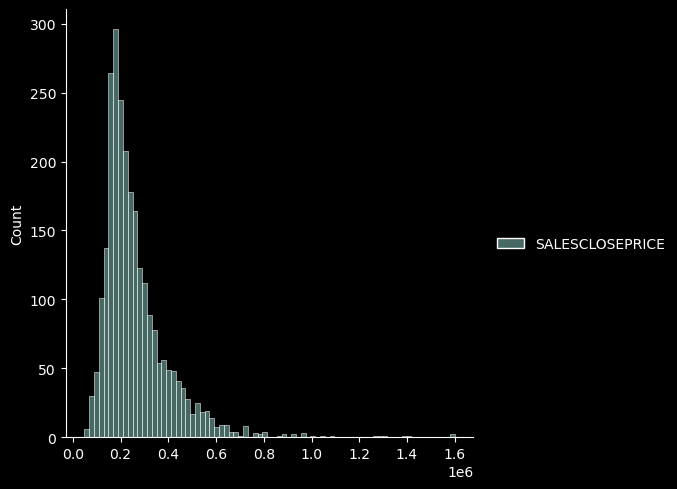

In [19]:
# Sample the Spark dataframe
sample_df = df.select(['SALESCLOSEPRICE']).sample(False, 0.5, 42)
# Convert the sample to a Pandas DataFrame
pandas_df = sample_df.toPandas()
# Plot it
sns.displot(pandas_df)

## Relationship plotting

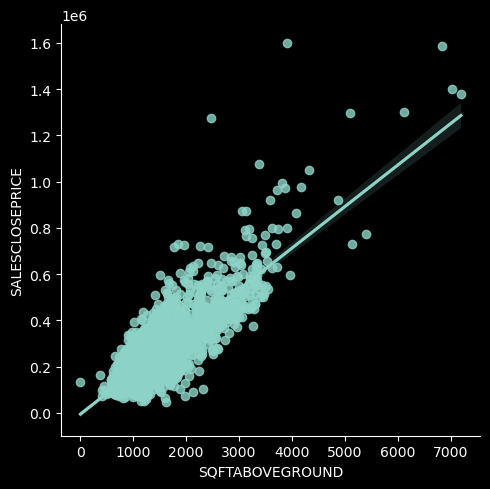

In [20]:
# Select columns
s_df = df.select(['SALESCLOSEPRICE', 'SQFTABOVEGROUND'])
# Sample dataframe
s_df = s_df.sample(False, 0.5, 42)
# Convert to Pandas DataFrame
pandas_df = s_df.toPandas()
# Plot it
sns.lmplot(x='SQFTABOVEGROUND', y='SALESCLOSEPRICE', data=pandas_df)

In [21]:
df.corr('SQFTABOVEGROUND', 'SALESCLOSEPRICE')

0.7901878498502957

## Exercises

### Using Corr() to find the max correlation

The old adage 'Correlation does not imply Causation' is a cautionary tale. However, correlation does give us a good nudge to know where to start looking promising features to use in our models. Use this exercise to get a feel for searching through your data for the first time, trying to find patterns.The old adage 'Correlation does not imply Causation' is a cautionary tale. However, correlation does give us a good nudge to know where to start looking promising features to use in our models. Use this exercise to get a feel for searching through your data for the first time, trying to find patterns.

**Max correlation between a list of columns to SALESCLOSEPRICE**

In [22]:
columns = ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES', 'PDOM', 'SQFTABOVEGROUND', 'TAXES', 'TAXWITHASSESSMENTS',
           'TAXYEAR', 'LIVINGAREA', 'YEARBUILT', 'ACRES',
           # 'BACKONMARKETDATE',
           'BATHSFULL', 'BATHSHALF', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'BEDROOMS', 'SQFTBELOWGROUND', 'ASSOCIATIONFEE', 'ASSESSEDVALUATION']

In [23]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = columns[0]

# Loop to check all columns contained in list
for col in columns:
    # Check the correlation of a pair of columns
    corr_val = df.corr(col, 'SALESCLOSEPRICE')
    # Logic to compare corr_max with current corr_val
    if corr_val > corr_max:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col)

LIVINGAREA


### Using Visualizations: seaborn displot

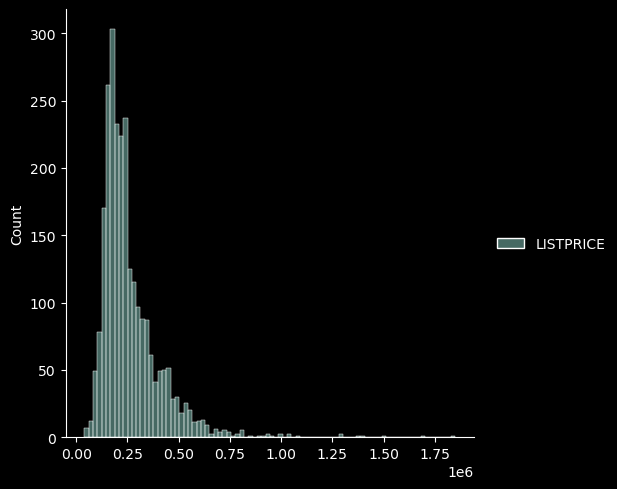

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [24]:
# Select a single column and sample and convert to pandas
sample_df = df.select(['LISTPRICE']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.displot(pandas_df)
plt.show()

# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

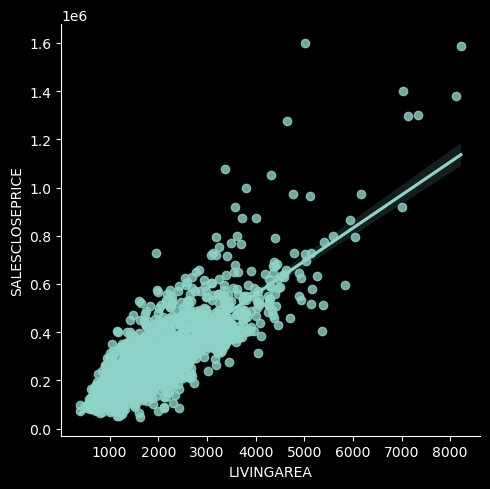

In [25]:
# Select a the relevant columns and sample
sample_df = df.select(['SALESCLOSEPRICE', 'LIVINGAREA']).sample(False, 0.5, 42)
# Convert to pandas datafr+ame
pandas_df = sample_df.toPandas()
# Linear model plot of pa+ndas_df
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)
plt.show()

In [26]:
len(df.columns)

74